In [13]:
import pandas as pd
import numpy as np
### Libraries for Algorithms
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.utils
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from loguru import logger
import seaborn as sns
from xgboost import XGBClassifier

In [22]:
from imblearn.over_sampling import SMOTE

# Training model

In [2]:
cur_train = pd.read_csv('../new_data/fincrime/scenario01/solution_centralized/train.csv')
cur_test = pd.read_csv('../new_data/fincrime/scenario01/solution_centralized/test.csv')

# Oversampling

In [136]:
new_train = cur_train.copy()
new_test = cur_test.copy()

X_train = new_train.iloc[:, new_train.columns != "Label"]
y_train = new_train.iloc[:, new_train.columns == "Label"]
X_test = new_test.iloc[:, new_test.columns != "Label"]
y_test = new_test.iloc[:, new_test.columns == "Label"]


In [30]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote["Label"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [154]:
# original performance

model = XGBClassifier(n_estimators = 180, learning_rate = 0.12, max_depth = 6)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pred_proba_xgb = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("AUPRC:", metrics.average_precision_score(y_true=y_test, y_score=pred_proba_xgb))
print('AUC', metrics.roc_auc_score(Y_test, pred_proba_xgb))

[[1002359      36]
 [    312     967]]
AUPRC: 0.8754638213971173
AUC 0.9987848099111464


In [36]:
# train on the oversampled traning data

model_smote = XGBClassifier(n_estimators = 100)

model_smote.fit(X_train_smote,y_train_smote)
y_pred = model_smote.predict(X_test)
pred_proba_xgb = model_smote.predict_proba(X_test)[:, 1]
y_pred = model_smote.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("AUPRC:", metrics.average_precision_score(y_true=y_test, y_score=pred_proba_xgb))
print('AUC', metrics.roc_auc_score(Y_test, pred_proba_xgb))

[[991136  11259]
 [   118   1161]]
AUPRC: 0.8176496598410984
AUC 0.9944110715664755


# Thresholds

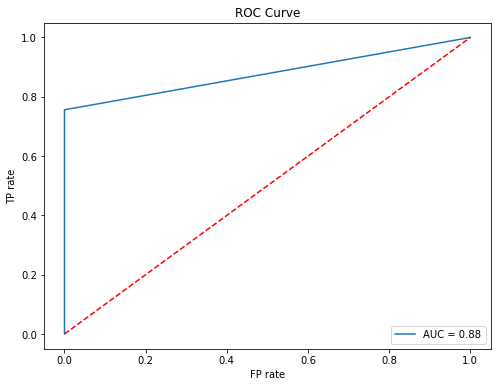

In [10]:
model = XGBClassifier(n_estimators = 180, learning_rate = 0.12, max_depth = 6)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

fp_r, tp_r, t = metrics.roc_curve(Y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [11]:
t_opt_idx = np.argmax(tp_r - fp_r)
t_opt = t[t_opt_idx]
print("Threshold value is: %.2f" % t_opt)

Threshold value is: 1.00


Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

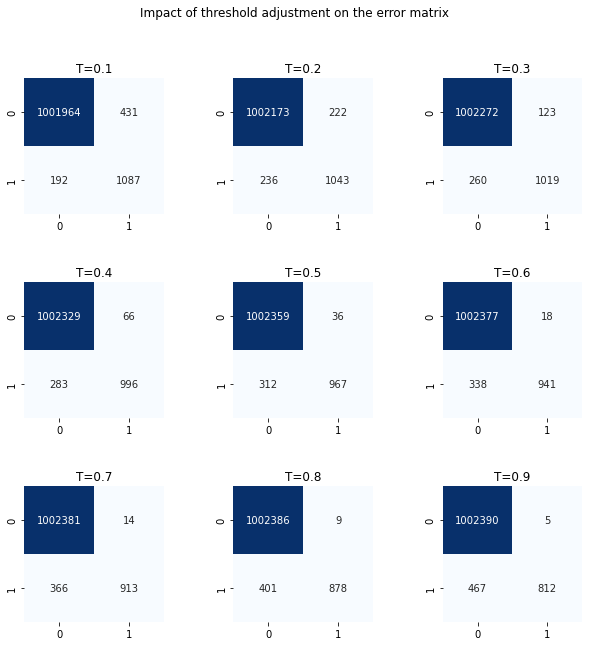

In [17]:
y_pred = model.predict_proba(X_test)[:,1]

fig, axes = plt.subplots(3,3, figsize=(10,10))

for t, ax in enumerate(axes.flat):
    threshold = (t+1)/100

    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = metrics.confusion_matrix(Y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.1f" % threshold)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

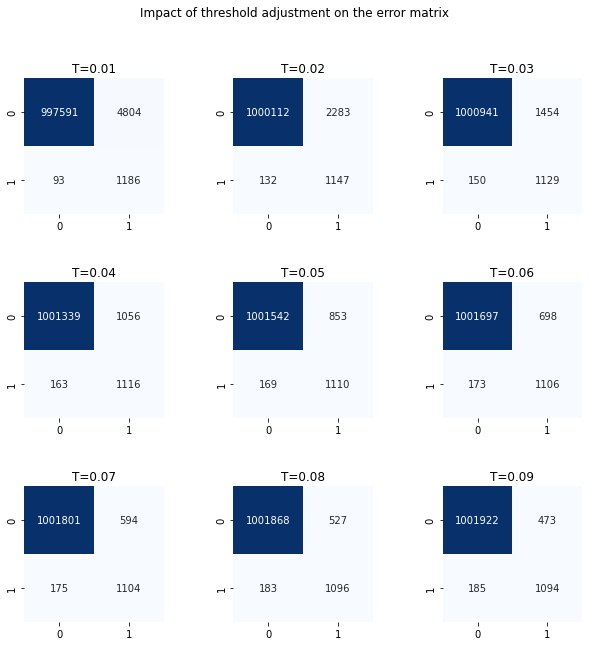

In [291]:
y_pred = model.predict_proba(X_test)[:,1]

fig, axes = plt.subplots(3,3, figsize=(10,10))

for t, ax in enumerate(axes.flat):
    threshold = (t+1)/100

    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = metrics.confusion_matrix(Y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.2f" % threshold)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")
plt.show()

In [144]:
y_pred = model.predict_proba(X_test)[:,1]

res = []
for t in range(100):
    threshold = (t+1)/100
    
    y_pred_int = (y_pred > threshold).astype(float)
    res.append(metrics.average_precision_score(y_true=y_test, y_score=pred_proba_int))
    

In [145]:
np.max(res)

0.717430842393272

# Hafiz

In [ ]:
new_train = cur_train.copy()
new_test = cur_test.copy()

X_train = new_train.iloc[:, new_train.columns != "Label"]
y_train = new_train.iloc[:, new_train.columns == "Label"]
X_test = new_test.iloc[:, new_test.columns != "Label"]
y_test = new_test.iloc[:, new_test.columns == "Label"]


In [74]:
# computing the score on the test set

model = XGBClassifier(n_estimators = 100)

model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))

pred_proba_xgb = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("AUPRC:", metrics.average_precision_score(y_true=y_test, y_score=pred_proba_xgb))
print('AUC', metrics.roc_auc_score(Y_test, pred_proba_xgb))

[[2990297      52]
 [    736    2785]]
[[1002359      36]
 [    312     967]]
AUPRC: 0.8754638213971173
AUC 0.9987848099111464


In [76]:
new_test['pred'] = y_pred
new_test['score'] = pred_proba_xgb

In [77]:
neg = new_test[new_test['pred']==0]

In [78]:
neg

,SettlementAmount,InstructedAmount,Label,BF,hour,sender_hour_freq,sender_currency_freq,sender_currency_avg_amount,sender_receiver_freq,pred,score
0,9.340010e+08,9.340010e+08,0,0,0,556.0,3996.0,1.006226e+11,4115,0,1.272724e-07
1,1.392714e+09,1.392714e+09,0,0,0,733.0,5076.0,9.801209e+10,5268,0,3.004620e-07
2,9.426845e+07,9.426845e+07,0,0,0,33.0,220.0,9.405543e+10,227,0,7.549247e-08
3,1.087671e+08,1.087671e+08,0,0,0,709.0,4655.0,1.035847e+11,5086,0,1.023951e-07
4,1.068417e+08,1.068417e+08,0,0,0,999.0,6749.0,1.017103e+11,6965,0,1.921234e-07
...,...,...,...,...,...,...,...,...,...,...,...
1003669,5.624866e+10,5.624866e+10,0,0,15,6489.0,53332.0,1.431644e+11,56129,0,3.874253e-07
1003670,8.075275e+09,8.075275e+09,0,0,15,8454.0,65763.0,1.433698e+11,71769,0,1.613893e-07
1003671,9.531184e+09,9.531184e+09,0,0,15,815.0,6676.0,1.423152e+11,7097,0,2.075006e-07
1003672,1.097831e+10,1.097831e+10,0,0,15,160.0,1143.0,1.460978e+11,1207,0,5.960975e-07


In [151]:
X = neg.drop(['Label', 'pred', 'score'], axis = 1).values
y = neg['Label'].values

model = XGBClassifier(n_estimators = 100)

model.fit(X,y)
y_proba = model.predict_proba(X)[:, 1]
predy = model.predict(X)

print(confusion_matrix(y, predy))

print("AUPRC:", metrics.average_precision_score(y_true=y, y_score=y_proba))


[[1002358       1]
 [    171     141]]
AUPRC: 0.8455422056679145


In [83]:
X = neg.drop(['Label', 'pred', 'score'], axis = 1).values
y = neg['Label'].values

trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.2, stratify= y)
model = XGBClassifier(n_estimators = 100)

model.fit(trainX,trainY)
y_proba = model.predict_proba(testX)[:, 1]
predy = model.predict(testX)

print(confusion_matrix(testY, predy))

print("AUPRC:", metrics.average_precision_score(y_true=testY, y_score=y_proba))
print('AUC', metrics.roc_auc_score(testY, y_proba))

[[200454     19]
 [    59      3]]
AUPRC: 0.08689676850799746
AUC 0.9915651902605177


In [91]:
neg

,SettlementAmount,InstructedAmount,Label,BF,hour,sender_hour_freq,sender_currency_freq,sender_currency_avg_amount,sender_receiver_freq,pred,score
0,9.340010e+08,9.340010e+08,0,0,0,556.0,3996.0,1.006226e+11,4115,0,1.272724e-07
1,1.392714e+09,1.392714e+09,0,0,0,733.0,5076.0,9.801209e+10,5268,0,3.004620e-07
2,9.426845e+07,9.426845e+07,0,0,0,33.0,220.0,9.405543e+10,227,0,7.549247e-08
3,1.087671e+08,1.087671e+08,0,0,0,709.0,4655.0,1.035847e+11,5086,0,1.023951e-07
4,1.068417e+08,1.068417e+08,0,0,0,999.0,6749.0,1.017103e+11,6965,0,1.921234e-07
...,...,...,...,...,...,...,...,...,...,...,...
1003669,5.624866e+10,5.624866e+10,0,0,15,6489.0,53332.0,1.431644e+11,56129,0,3.874253e-07
1003670,8.075275e+09,8.075275e+09,0,0,15,8454.0,65763.0,1.433698e+11,71769,0,1.613893e-07
1003671,9.531184e+09,9.531184e+09,0,0,15,815.0,6676.0,1.423152e+11,7097,0,2.075006e-07
1003672,1.097831e+10,1.097831e+10,0,0,15,160.0,1143.0,1.460978e+11,1207,0,5.960975e-07


In [113]:
def compare_leg_fraud(df, attribute):
    fn_trS = df.loc[(df["pred"] == 0) & (df['Label']==1) ][attribute].rename("FalseNegative").describe()
    tp_trS = df.loc[(df["pred"] == 1) & (df['Label']==1)][attribute].rename("TruePositve").describe()
    tn_trS = df.loc[(df["pred"] == 0) & (df['Label']==0) ][attribute].rename("TrueNegative").describe()
    tr_hourDF = fn_trS.to_frame().join(tp_trS.to_frame()).join(tn_trS.to_frame())
    return tr_hourDF

In [115]:
for col in new_test.columns:
    if col != 'Label':
        print(col + '\t')
        print(compare_leg_fraud(new_test, col))

SettlementAmount	
       FalseNegative   TruePositve  TrueNegative
count   3.120000e+02  9.670000e+02  1.002359e+06
mean    3.533099e+11  2.366022e+11  1.163421e+11
std     2.193678e+11  7.994738e+10  1.065098e+11
min     4.580450e+09  2.212465e+10  0.000000e+00
25%     1.252096e+11  1.922923e+11  3.006940e+10
50%     3.831000e+11  2.344994e+11  9.011438e+10
75%     5.476881e+11  2.777968e+11  1.731076e+11
max     7.555838e+11  7.379816e+11  9.051958e+11
InstructedAmount	
       FalseNegative   TruePositve  TrueNegative
count   3.120000e+02  9.670000e+02  1.002359e+06
mean    3.533099e+11  2.366022e+11  1.163421e+11
std     2.193678e+11  7.994738e+10  1.065098e+11
min     4.580450e+09  2.212465e+10  0.000000e+00
25%     1.252096e+11  1.922923e+11  3.006940e+10
50%     3.831000e+11  2.344994e+11  9.011438e+10
75%     5.476881e+11  2.777968e+11  1.731076e+11
max     7.555838e+11  7.379816e+11  9.051958e+11
BF	
       FalseNegative  TruePositve  TrueNegative
count          312.0   967.000

In [116]:
fn_trS = new_test.loc[(new_test["pred"] == 0) & (new_test['Label']==1) ]
tp_trS = new_test.loc[(new_test["pred"] == 1) & (new_test['Label']==1)]
tn_trS = new_test.loc[(new_test["pred"] == 0) & (new_test['Label']==0) ]

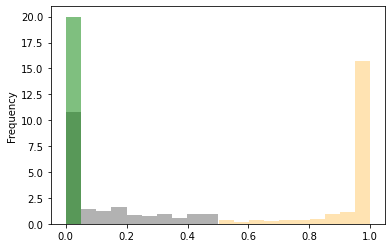

In [152]:

ax = plt.gca()

fn_trS['score'].plot(color = 'black', kind='hist', ax=ax, density=True, alpha=0.3) #  1 0
tp_trS['score'].plot(color = 'orange', kind='hist', ax=ax, density=True, alpha=0.3)#  1 1
tn_trS['score'].plot(color = 'green', kind='hist', ax=ax, density=True, alpha=0.5) #  0 0

plt.show()

# Classifiers

Given the train data, build the first XGBoost Classifer<br>
Predict the score for each transaction in the training dataset<br>
Train a new XGBoost for transactions whose scores are "lower/higher/inbetween" than the thresholds<br>
Replace the score of these transactions with the new predictions<br>


In [156]:
cur_train = pd.read_csv('../new_data/fincrime/scenario01/solution_centralized/train.csv')
cur_test = pd.read_csv('../new_data/fincrime/scenario01/solution_centralized/test.csv')

In [ ]:
new_train = cur_train.copy()
new_test = cur_test.copy()

X_train = new_train.iloc[:, new_train.columns != "Label"]
y_train = new_train.iloc[:, new_train.columns == "Label"]

X_test = new_test.iloc[:, new_test.columns != "Label"]
y_test = new_test.iloc[:, new_test.columns == "Label"]


In [171]:
model = XGBClassifier(n_estimators = 100, base_score = 0.5)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob_train 

array([1.1868819e-07, 1.1868819e-07, 1.1868819e-07, ..., 5.4827120e-05,
       4.8924391e-03, 1.8429653e-05], dtype=float32)

In [168]:
print(confusion_matrix(y_train, model.predict(X_train)))
print("AUPRC:", metrics.average_precision_score(y_true=y_train, y_score=y_prob_train))

[[2990286      63]
 [    760    2761]]
AUPRC: 0.9281252671234261


In [169]:
print(confusion_matrix(y_test, model.predict(X_test)))
print("AUPRC:", metrics.average_precision_score(y_true=y_test, y_score=model.predict_proba(X_test)[:, 1]))

[[1002353      42]
 [    323     956]]
AUPRC: 0.8704537274523667


In [270]:
class xgbootS:
    def __init__(self):
        
        return 
    
    def select_idx(self, area, y_prob, threshold):
        if area == 'right':
            false_idx = np.where((y_prob > threshold))[0]
        elif area == 'left':
            false_idx = np.where((y_prob < threshold))[0]
        else:
            false_idx = np.where( (y_prob < 0.501) & (y_prob > threshold))[0]
        
        return false_idx
    
    def classifier_1(self, X_train, y_train):
        """
        train the first XGBoost with the original training data
        """
        model1 = XGBClassifier(n_estimators = 100)
        model1.fit(X_train,y_train)
        
        return model1
    
    def classifier_2(self, area, model1, X_train, y_train, threshold):
        """
        Given the first XGBoost model, get the predicted score for each transaction in the X_train
        Select the transactions whose scores are in the defined range (select_idx)
        
        """
        y_prob_1 = model1.predict_proba(X_train)[:, 1] #Given the first XGBoost model, get the predicted score for each transaction in the X_train
        false_idx = self.select_idx(area, y_prob_1, threshold)#Select the transactions whose scores are in the defined range
        
        self.model2 = XGBClassifier(n_estimators = 100 ) # Train the second XGBoost on the selected transaction data
        self.model2.fit(X_train.take(false_idx, axis = 0),y_train.take(false_idx, axis = 0))
        
    def predict(self, area, model1, X_test, y_test, threshold):
        y_prob_1 = model1.predict_proba(X_test)[:, 1] # get the predicitons for all the transactions in test data with the first model
        y_pred_1 = model1.predict(X_test)
        
        
        false_idx = self.select_idx(area, y_prob_1, threshold)
        
        y_prob_2 = self.model2.predict_proba(X_test.take(false_idx, axis = 0))[:, 1]
        y_pred_2 = self.model2.predict(X_test.take(false_idx, axis = 0)) # get the predicitons for selected transactions in test data with the second model
        
        y_prob_1[false_idx] = y_prob_2 
        y_pred_1[false_idx] = y_pred_2
        
        return y_prob_1, y_pred_1, false_idx # return the predictions and selected index
    
    def evaluate(self, y_test, y_prob, y_pred): 
        tp, fp, fn, tn = confusion_matrix(y_test,y_pred).ravel()
        return tp, fp, fn, tn,  metrics.average_precision_score(y_test, y_prob)

In [271]:
models = xgbootS()
model1 = models.classifier_1(X_train, y_train) # Train first model for once
false_negative_all = np.zeros((49,3))
false_positive_all = np.zeros((49,3))

false_negative_step2 = np.zeros((49,3))
false_positive_step2 = np.zeros((49,3))
true_negative_step2 = np.zeros((49,3))
true_positive_step2 = np.zeros((49,3))


res = np.zeros((49,3))
res_step2 = np.zeros((49,3))

for idx, area in enumerate(['left', 'right', 'between']):
    for t in range(49):
        threshold = (t+1)/100
        models.classifier_2(area, model1, X_train, y_train, threshold) #overwrite the second xgboost with different thresholds
        y_prob_1, y_pred_1, false_idx = models.predict(area, model1,X_test,y_test, threshold)
        
        # evaluate step2
        tp, fp, fn, tn, score = models.evaluate(y_test.take(false_idx, axis = 0), 
                                                y_prob_1.take(false_idx, axis = 0),
                                                y_pred_1.take(false_idx, axis = 0))
        
        # evaluate overall
        _, fp_all, fn_all, _,  score_all = models.evaluate(y_test, y_prob_1, y_pred_1)
        
        res[t, idx] = score_all
        res_step2[t, idx] = score
        
        false_negative_all[t, idx] = fn_all
        false_positive_all[t, idx] = fp_all
        
        false_negative_step2[t, idx] = fn
        false_positive_step2[t, idx] = fp
        true_negative_step2[t, idx] = tn
        true_positive_step2[t, idx] = tp


In [276]:
false_negative_step2

array([[ 93., 220., 215.],
       [132., 169., 174.],
       [150., 151., 159.],
       [163., 143., 145.],
       [169., 126., 139.],
       [173., 118., 132.],
       [175., 113., 122.],
       [183., 108., 116.],
       [185., 107., 114.],
       [192.,  96., 107.],
       [197.,  90., 101.],
       [198.,  81.,  99.],
       [206.,  70.,  89.],
       [210.,  66.,  85.],
       [211.,  67.,  84.],
       [217.,  54.,  78.],
       [223.,  50.,  70.],
       [228.,  45.,  65.],
       [230.,  36.,  60.],
       [234.,  34.,  58.],
       [237.,  33.,  48.],
       [243.,  24.,  46.],
       [247.,  23.,  41.],
       [248.,  19.,  41.],
       [249.,  22.,  40.],
       [252.,  17.,  38.],
       [251.,  15.,  34.],
       [253.,  12.,  29.],
       [256.,   9.,  24.],
       [258.,  12.,  21.],
       [259.,   8.,  21.],
       [261.,   6.,  19.],
       [268.,   6.,  13.],
       [270.,   7.,  15.],
       [271.,   6.,  14.],
       [272.,   7.,  12.],
       [275.,   6.,   9.],
 

In [275]:
true_negative_step2

array([[0.000e+00, 9.660e+02, 4.000e+00],
       [0.000e+00, 9.780e+02, 6.000e+00],
       [0.000e+00, 9.780e+02, 3.000e+00],
       [0.000e+00, 9.730e+02, 4.000e+00],
       [0.000e+00, 9.840e+02, 4.000e+00],
       [0.000e+00, 9.880e+02, 7.000e+00],
       [0.000e+00, 9.910e+02, 1.500e+01],
       [0.000e+00, 9.880e+02, 1.300e+01],
       [0.000e+00, 9.870e+02, 1.300e+01],
       [0.000e+00, 9.910e+02, 1.300e+01],
       [0.000e+00, 9.920e+02, 1.400e+01],
       [0.000e+00, 1.000e+03, 1.500e+01],
       [0.000e+00, 1.003e+03, 1.700e+01],
       [0.000e+00, 1.003e+03, 1.700e+01],
       [0.000e+00, 1.001e+03, 1.700e+01],
       [0.000e+00, 1.008e+03, 1.700e+01],
       [2.000e+00, 1.004e+03, 1.700e+01],
       [2.000e+00, 1.004e+03, 1.700e+01],
       [2.000e+00, 1.011e+03, 2.000e+01],
       [2.000e+00, 1.009e+03, 1.800e+01],
       [2.000e+00, 1.007e+03, 2.500e+01],
       [0.000e+00, 1.012e+03, 2.300e+01],
       [0.000e+00, 1.009e+03, 2.400e+01],
       [0.000e+00, 1.012e+03, 2.30

In [277]:
false_negative

array([[312., 313., 312.],
       [312., 301., 310.],
       [312., 301., 311.],
       [312., 306., 308.],
       [312., 295., 308.],
       [312., 291., 307.],
       [312., 288., 302.],
       [312., 291., 304.],
       [312., 292., 301.],
       [312., 288., 301.],
       [312., 287., 303.],
       [312., 279., 300.],
       [312., 276., 297.],
       [312., 276., 299.],
       [312., 278., 297.],
       [312., 271., 294.],
       [310., 275., 295.],
       [310., 275., 295.],
       [310., 268., 296.],
       [310., 270., 292.],
       [310., 272., 290.],
       [312., 267., 289.],
       [312., 270., 291.],
       [312., 267., 291.],
       [312., 271., 292.],
       [311., 270., 292.],
       [309., 269., 288.],
       [309., 268., 287.],
       [310., 267., 285.],
       [310., 272., 284.],
       [309., 270., 283.],
       [309., 270., 281.],
       [310., 276., 285.],
       [310., 279., 285.],
       [308., 281., 290.],
       [309., 282., 287.],
       [311., 282., 287.],
 

In [266]:
false_positive

array([[ 36.,  43.,  39.],
       [ 36.,  59.,  42.],
       [ 36.,  72.,  48.],
       [ 36.,  80.,  64.],
       [ 36.,  87.,  62.],
       [ 36., 108.,  80.],
       [ 36.,  99.,  82.],
       [ 36., 101.,  85.],
       [ 36., 113.,  96.],
       [ 36., 135.,  96.],
       [ 36., 134.,  92.],
       [ 36., 139.,  98.],
       [ 36., 144., 108.],
       [ 36., 149., 101.],
       [ 37., 150., 106.],
       [ 36., 155., 110.],
       [ 36., 152.,  99.],
       [ 36., 134.,  97.],
       [ 36., 151.,  97.],
       [ 37., 140.,  92.],
       [ 36., 136.,  98.],
       [ 36., 127.,  95.],
       [ 36., 134.,  91.],
       [ 36., 124.,  94.],
       [ 37., 121.,  89.],
       [ 36., 120.,  92.],
       [ 37., 116.,  87.],
       [ 37., 114.,  85.],
       [ 37., 116.,  87.],
       [ 38., 108.,  85.],
       [ 38., 105.,  83.],
       [ 38., 100.,  77.],
       [ 38.,  95.,  78.],
       [ 38.,  89.,  74.],
       [ 39.,  85.,  69.],
       [ 39.,  84.,  68.],
       [ 40.,  80.,  67.],
 

In [263]:
res

array([[0.87307072, 0.8682874 , 0.85367663],
       [0.86949283, 0.86834036, 0.85320565],
       [0.86702656, 0.86786163, 0.85556664],
       [0.86556909, 0.86688035, 0.85639122],
       [0.86550245, 0.86694201, 0.85669728],
       [0.86606013, 0.86752803, 0.85872952],
       [0.86565765, 0.86831329, 0.85943797],
       [0.86460303, 0.86894633, 0.85970989],
       [0.86403691, 0.86823576, 0.85940476],
       [0.86054527, 0.86875777, 0.86174017],
       [0.86104623, 0.86956389, 0.86211116],
       [0.86218417, 0.86916697, 0.86027237],
       [0.85977092, 0.86799797, 0.86133367],
       [0.85683018, 0.86856669, 0.86217548],
       [0.85756042, 0.8689846 , 0.86178912],
       [0.85599327, 0.86784613, 0.86236469],
       [0.85490696, 0.86810734, 0.86407318],
       [0.85153961, 0.86972155, 0.86505327],
       [0.84971429, 0.86861382, 0.86400897],
       [0.84900881, 0.86881478, 0.86472695],
       [0.84674451, 0.86879684, 0.8646518 ],
       [0.84583476, 0.8700352 , 0.86555553],
       [0.